(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)
(48999, 172)
(21000, 172)
<class 'pandas.core.frame.DataFrame'>
Index: 48999 entries, 48645 to 38408
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7 

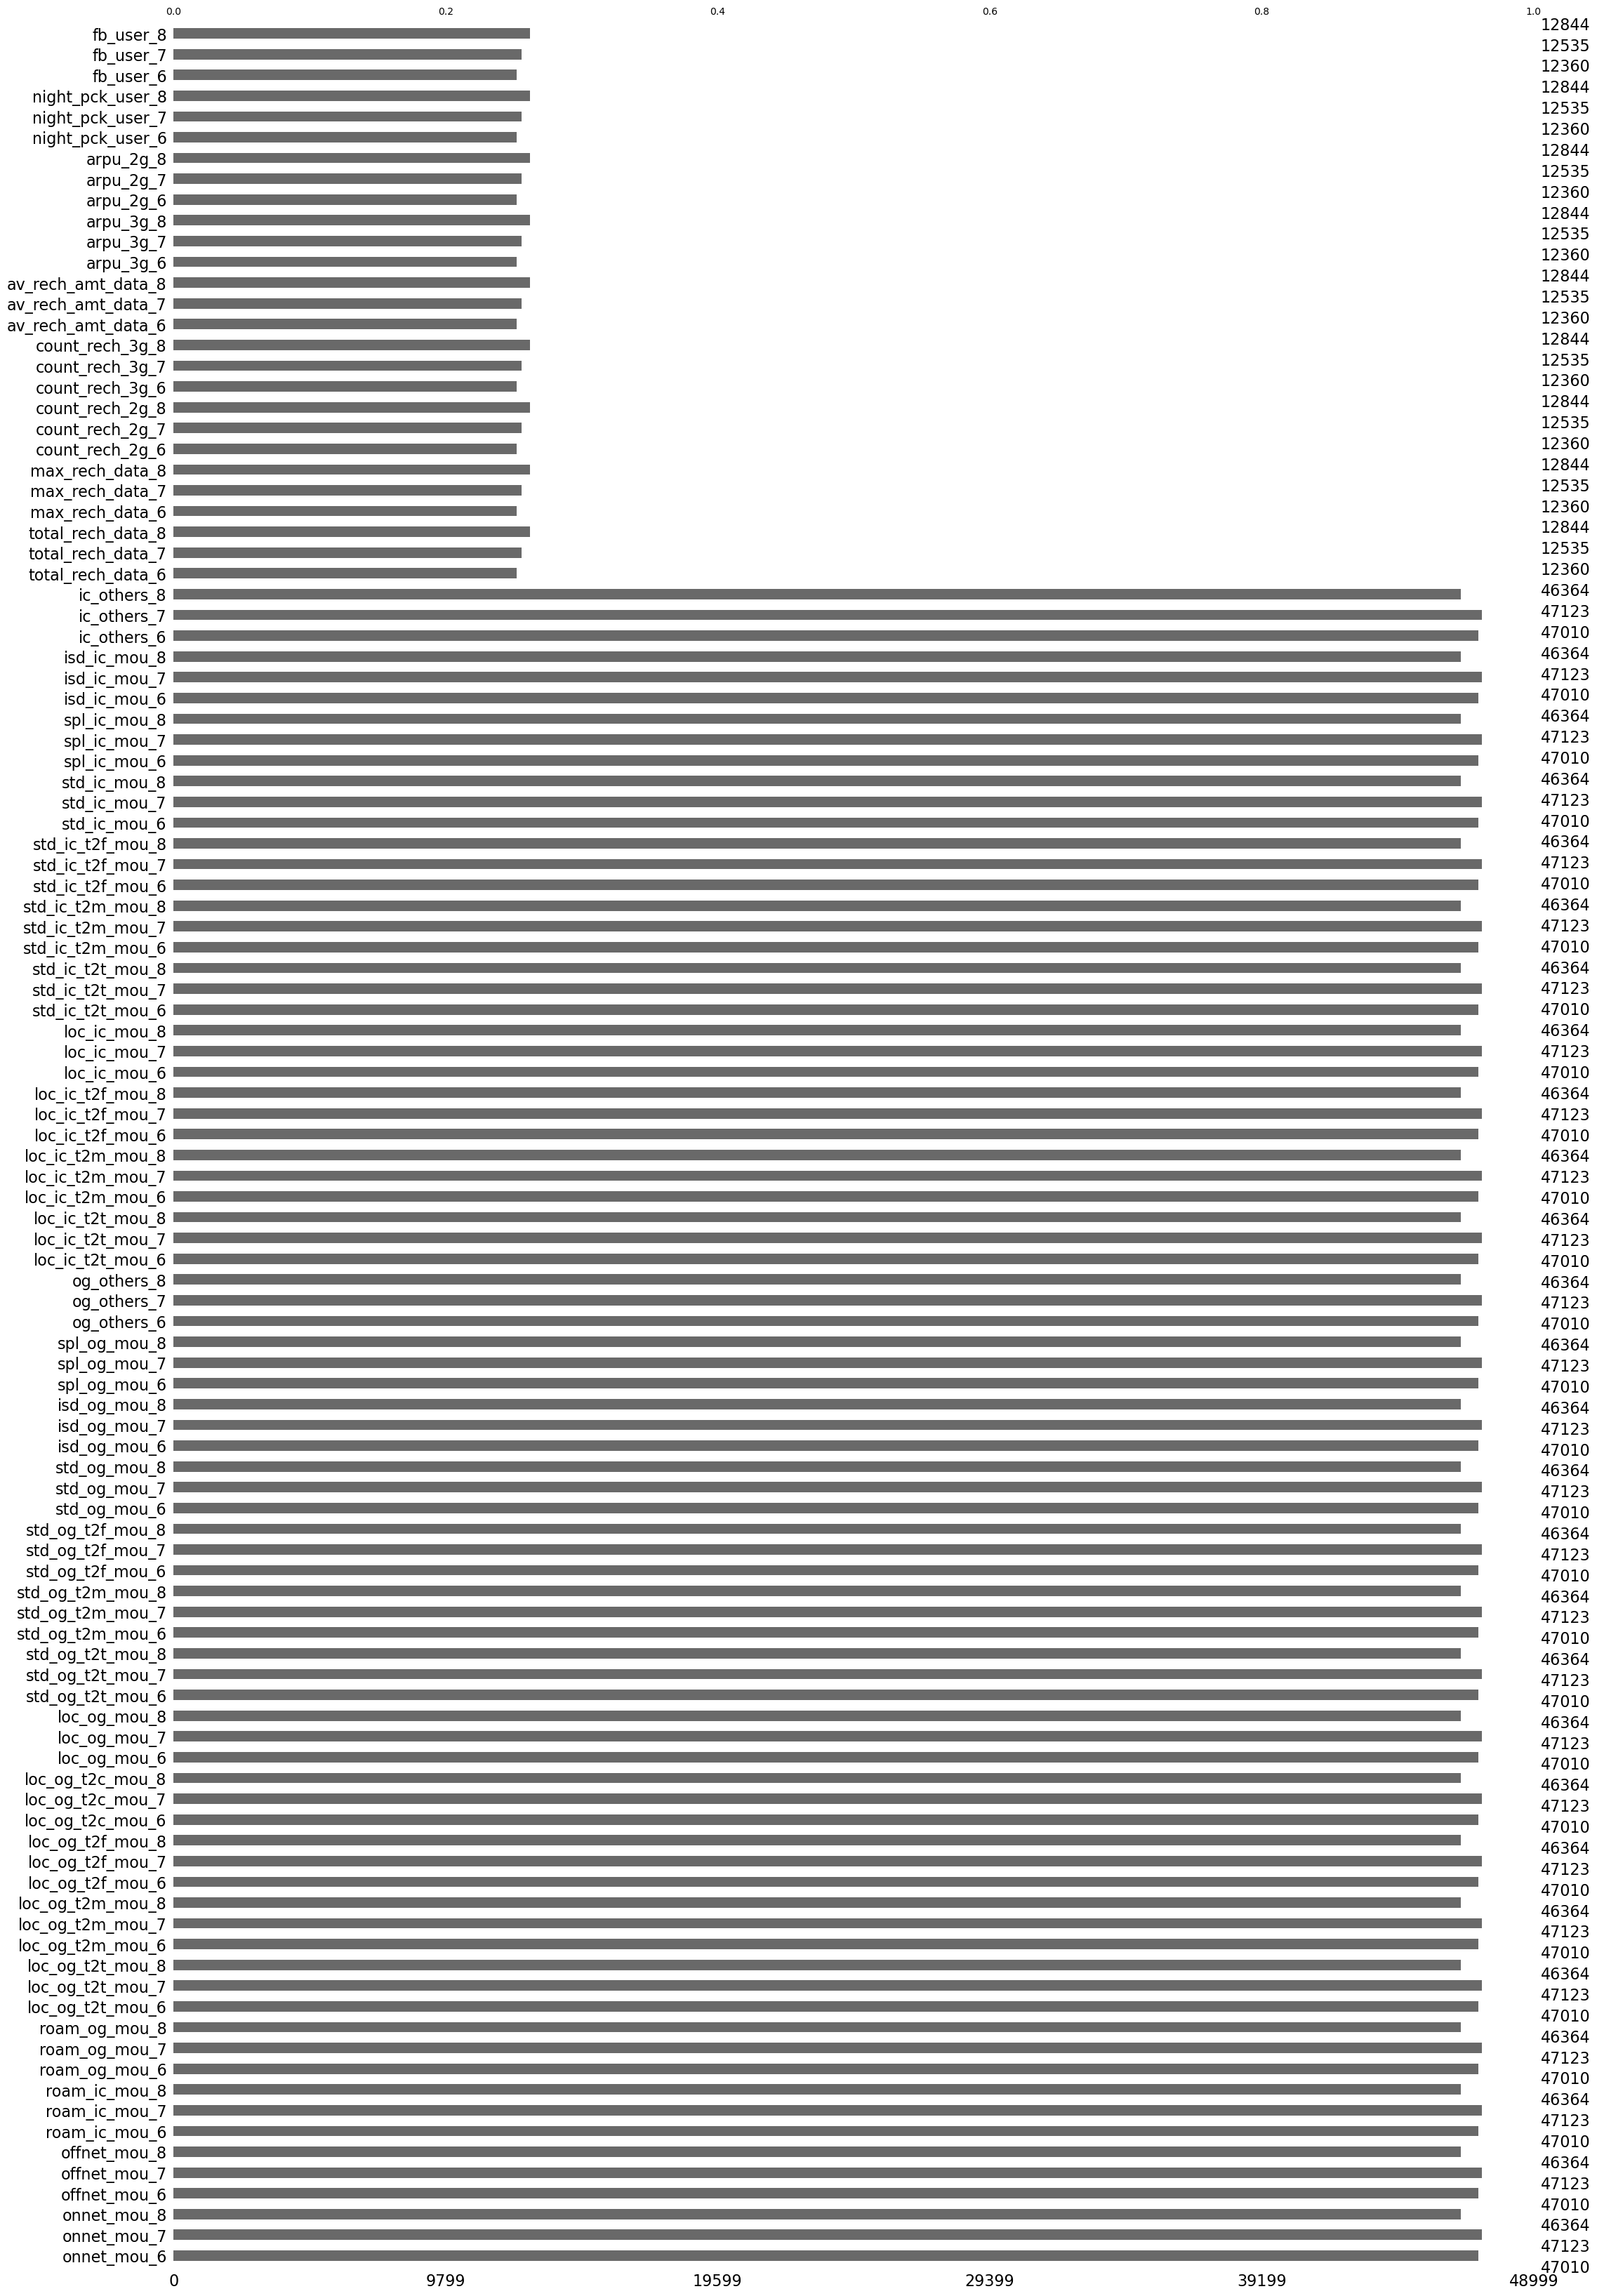

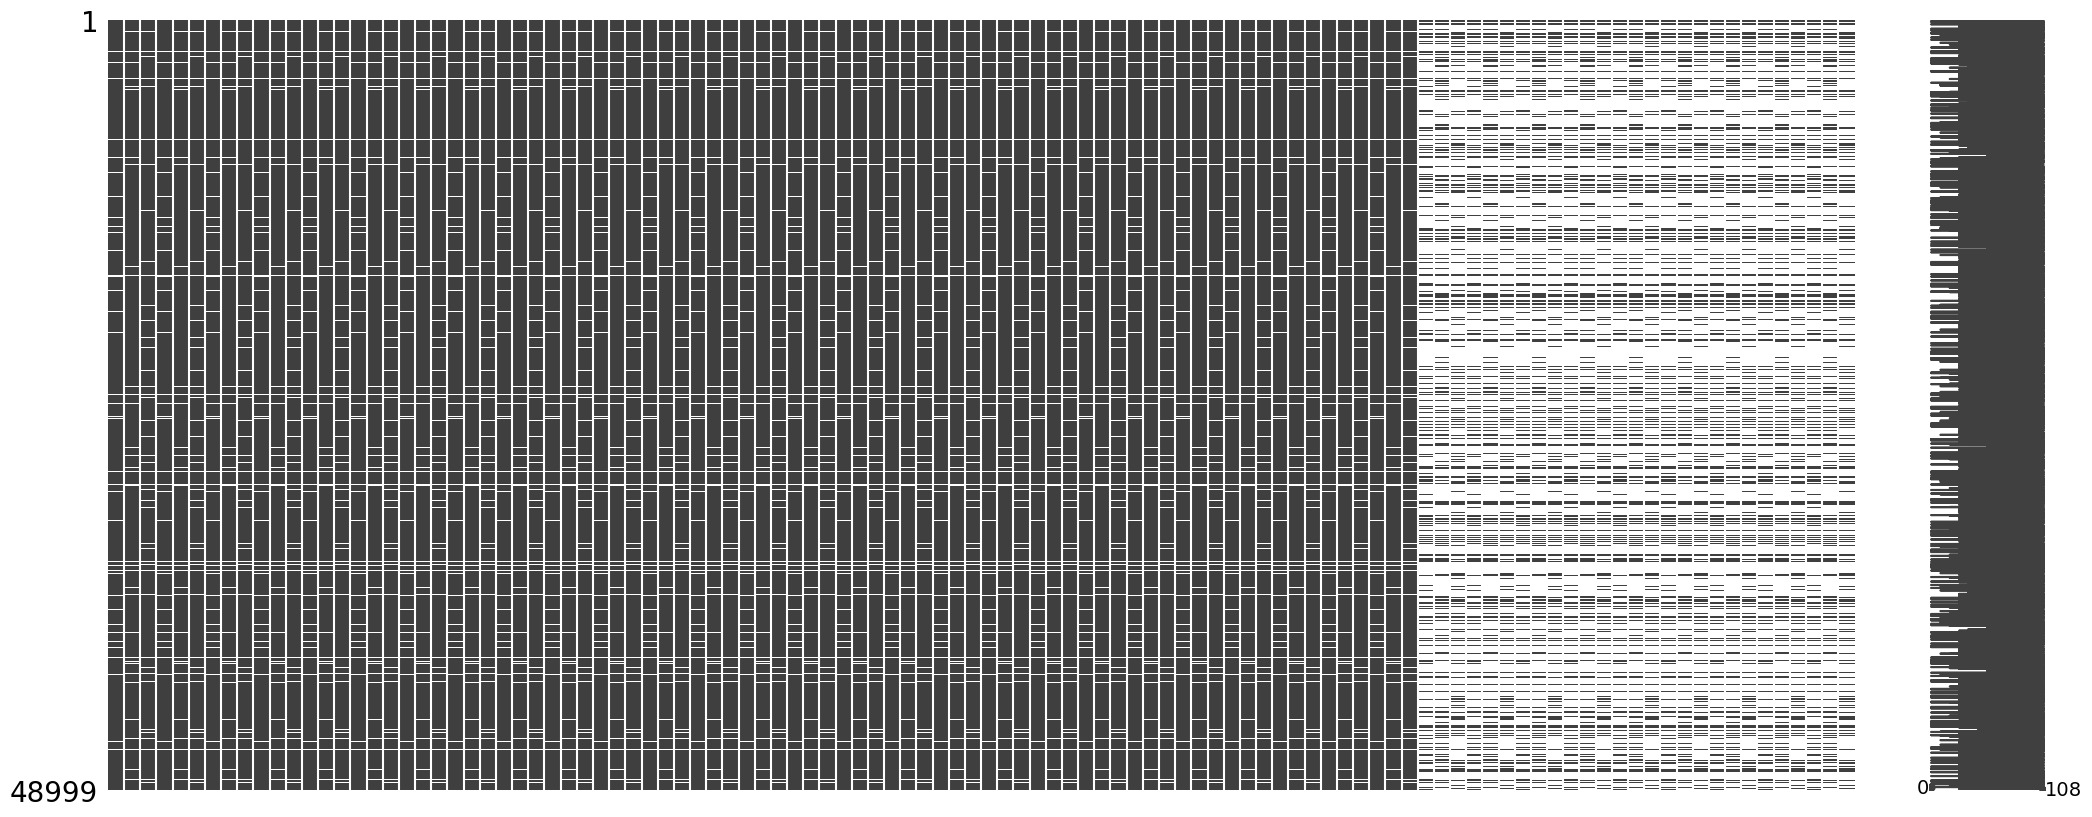

columns with monthly data : 
['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user', 'vbc_3g']
--------------------------
Remaining columns : 
['aon', 'churn_probability']
(87932, 101) (87932,)
(87932, 101) (87932,)
Explained Variance Ratio: 0.9831359325475406


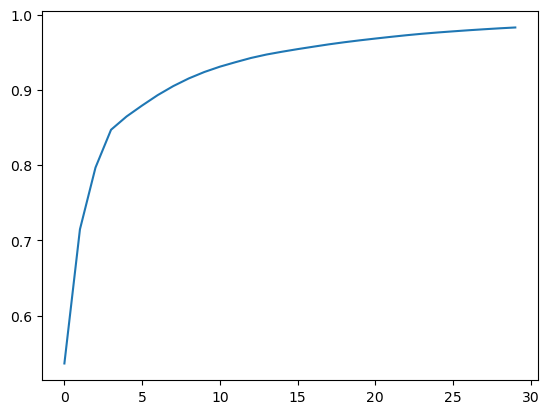

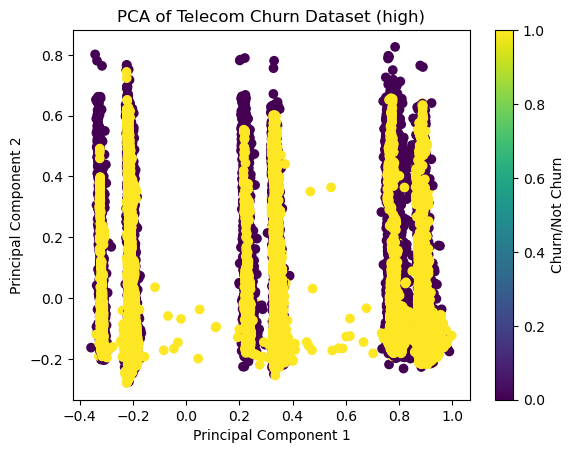

Variable,Value
target,churn_probability
timeseries_col_list,"[arpu, onnet_mou, offnet_mou, roam_ic_mou, roam_og_mou, loc_og_t2t_mou, loc_og_t2m_mou, loc_og_t2f_mou, loc_og_t2c_mou, loc_og_mou, std_og_t2t_mou, std_og_t2m_mou, std_og_t2f_mou, std_og_mou, isd_og_mou, spl_og_mou, og_others, total_og_mou, loc_ic_t2t_mou, loc_ic_t2m_mou, loc_ic_t2f_mou, loc_ic_mou, std_ic_t2t_mou, std_ic_t2m_mou, std_ic_t2f_mou, std_ic_mou, total_ic_mou, spl_ic_mou, isd_ic_mou, ic_others, total_rech_num, total_rech_amt, max_rech_amt, last_day_rch_amt, total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, vol_2g_mb, vol_3g_mb, arpu_3g, arpu_2g, night_pck_user, monthly_2g, sachet_2g, monthly_3g, sachet_3g, fb_user, vbc_3g]"
remaining_col_list,"[aon, churn_probability, id]"
revenue_threshold_value,None
revenue_threshold_column,None
scaler,MinMaxScaler()
scaling_cols,"Index(['aon', 'churn_probability', 'arpu_baseline', 'arpu_delta', 'onnet_mou_baseline', 'onnet_mou_delta', 'offnet_mou_baseline', 'offnet_mou_delta', 'roam_ic_mou_baseline', 'roam_ic_mou_delta', ... 'sachet_2g_baseline', 'sachet_2g_delta', 'monthly_3g_baseline', 'monthly_3g_delta', 'sachet_3g_baseline', 'sachet_3g_delta', 'fb_user_baseline', 'fb_user_delta', 'vbc_3g_baseline', 'vbc_3g_delta'], dtype='object', length=102)"
unique_cols,None
scale_pos_weight,None
pca,IncrementalPCA(n_components=20)


None


Variable,Value
target,churn_probability
timeseries_col_list,"[arpu, onnet_mou, offnet_mou, roam_ic_mou, roam_og_mou, loc_og_t2t_mou, loc_og_t2m_mou, loc_og_t2f_mou, loc_og_t2c_mou, loc_og_mou, std_og_t2t_mou, std_og_t2m_mou, std_og_t2f_mou, std_og_mou, isd_og_mou, spl_og_mou, og_others, total_og_mou, loc_ic_t2t_mou, loc_ic_t2m_mou, loc_ic_t2f_mou, loc_ic_mou, std_ic_t2t_mou, std_ic_t2m_mou, std_ic_t2f_mou, std_ic_mou, total_ic_mou, spl_ic_mou, isd_ic_mou, ic_others, total_rech_num, total_rech_amt, max_rech_amt, last_day_rch_amt, total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, vol_2g_mb, vol_3g_mb, arpu_3g, arpu_2g, night_pck_user, monthly_2g, sachet_2g, monthly_3g, sachet_3g, fb_user, vbc_3g]"
remaining_col_list,"[aon, churn_probability, id]"
revenue_threshold_value,None
revenue_threshold_column,None
scaler,MinMaxScaler()
scaling_cols,"Index(['aon', 'churn_probability', 'arpu_baseline', 'arpu_delta', 'onnet_mou_baseline', 'onnet_mou_delta', 'offnet_mou_baseline', 'offnet_mou_delta', 'roam_ic_mou_baseline', 'roam_ic_mou_delta', ... 'sachet_2g_baseline', 'sachet_2g_delta', 'monthly_3g_baseline', 'monthly_3g_delta', 'sachet_3g_baseline', 'sachet_3g_delta', 'fb_user_baseline', 'fb_user_delta', 'vbc_3g_baseline', 'vbc_3g_delta'], dtype='object', length=102)"
unique_cols,None
scale_pos_weight,None
pca,IncrementalPCA(n_components=20)


None

 Dataset:df_complete:  (48999, 172)

 Data: df:  (48999, 103)

 Data: X:  (48999, 20)

 Data: y:  (48999,)


Variable,Value
target,churn_probability
timeseries_col_list,"[arpu, onnet_mou, offnet_mou, roam_ic_mou, roam_og_mou, loc_og_t2t_mou, loc_og_t2m_mou, loc_og_t2f_mou, loc_og_t2c_mou, loc_og_mou, std_og_t2t_mou, std_og_t2m_mou, std_og_t2f_mou, std_og_mou, isd_og_mou, spl_og_mou, og_others, total_og_mou, loc_ic_t2t_mou, loc_ic_t2m_mou, loc_ic_t2f_mou, loc_ic_mou, std_ic_t2t_mou, std_ic_t2m_mou, std_ic_t2f_mou, std_ic_mou, total_ic_mou, spl_ic_mou, isd_ic_mou, ic_others, total_rech_num, total_rech_amt, max_rech_amt, last_day_rch_amt, total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, vol_2g_mb, vol_3g_mb, arpu_3g, arpu_2g, night_pck_user, monthly_2g, sachet_2g, monthly_3g, sachet_3g, fb_user, vbc_3g]"
remaining_col_list,"[aon, churn_probability, id]"
revenue_threshold_value,None
revenue_threshold_column,None
scaler,MinMaxScaler()
scaling_cols,"Index(['aon', 'churn_probability', 'arpu_baseline', 'arpu_delta', 'onnet_mou_baseline', 'onnet_mou_delta', 'offnet_mou_baseline', 'offnet_mou_delta', 'roam_ic_mou_baseline', 'roam_ic_mou_delta', ... 'sachet_2g_baseline', 'sachet_2g_delta', 'monthly_3g_baseline', 'monthly_3g_delta', 'sachet_3g_baseline', 'sachet_3g_delta', 'fb_user_baseline', 'fb_user_delta', 'vbc_3g_baseline', 'vbc_3g_delta'], dtype='object', length=102)"
unique_cols,None
scale_pos_weight,None
pca,IncrementalPCA(n_components=20)


None

 Dataset:df_complete:  (21000, 172)

 Data: df:  (21000, 103)

 Data: X:  (21000, 20)

 Data: y:  (21000,)


Variable,Value
target,churn_probability
timeseries_col_list,"[arpu, onnet_mou, offnet_mou, roam_ic_mou, roam_og_mou, loc_og_t2t_mou, loc_og_t2m_mou, loc_og_t2f_mou, loc_og_t2c_mou, loc_og_mou, std_og_t2t_mou, std_og_t2m_mou, std_og_t2f_mou, std_og_mou, isd_og_mou, spl_og_mou, og_others, total_og_mou, loc_ic_t2t_mou, loc_ic_t2m_mou, loc_ic_t2f_mou, loc_ic_mou, std_ic_t2t_mou, std_ic_t2m_mou, std_ic_t2f_mou, std_ic_mou, total_ic_mou, spl_ic_mou, isd_ic_mou, ic_others, total_rech_num, total_rech_amt, max_rech_amt, last_day_rch_amt, total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, vol_2g_mb, vol_3g_mb, arpu_3g, arpu_2g, night_pck_user, monthly_2g, sachet_2g, monthly_3g, sachet_3g, fb_user, vbc_3g]"
remaining_col_list,"[aon, churn_probability, id]"
revenue_threshold_value,None
revenue_threshold_column,None
scaler,MinMaxScaler()
scaling_cols,"Index(['aon', 'churn_probability', 'arpu_baseline', 'arpu_delta', 'onnet_mou_baseline', 'onnet_mou_delta', 'offnet_mou_baseline', 'offnet_mou_delta', 'roam_ic_mou_baseline', 'roam_ic_mou_delta', ... 'sachet_2g_baseline', 'sachet_2g_delta', 'monthly_3g_baseline', 'monthly_3g_delta', 'sachet_3g_baseline', 'sachet_3g_delta', 'fb_user_baseline', 'fb_user_delta', 'vbc_3g_baseline', 'vbc_3g_delta'], dtype='object', length=102)"
unique_cols,None
scale_pos_weight,None
pca,IncrementalPCA(n_components=20)


None

 Dataset:df_complete:  (30000, 172)

 Data: df:  (30000, 103)

 Data: X:  (30000, 20)

 Data: y:  (30000,)


objective:,binary:logistic
enable_categorical:,False
missing:,nan
n_jobs:,-1


objective:,binary:logistic
colsample_bytree:,1.0
enable_categorical:,False
learning_rate:,0.3
max_depth:,6
missing:,nan
n_estimators:,200
n_jobs:,-1
subsample:,0.8


C:,1.0
break_ties:,False
cache_size:,200
coef0:,0.0
decision_function_shape:,ovr
degree:,3
gamma:,scale
kernel:,rbf
max_iter:,-1
probability:,True
random_state:,42


C:,10
break_ties:,False
cache_size:,200
coef0:,0.0
decision_function_shape:,ovr
degree:,3
gamma:,scale
kernel:,rbf
max_iter:,-1
probability:,True
random_state:,42


C:,1.0
dual:,False
fit_intercept:,True
intercept_scaling:,1
max_iter:,100
multi_class:,auto
penalty:,l2
solver:,lbfgs
tol:,0.0001
verbose:,0
warm_start:,False


C:,10
dual:,False
fit_intercept:,True
intercept_scaling:,1
max_iter:,100
multi_class:,auto
penalty:,l2
solver:,lbfgs
tol:,0.0001
verbose:,0
warm_start:,False


verbose:,0


random_seed:,42
verbose:,0
border_count:,32
depth:,6
learning_rate:,0.1
l2_leaf_reg:,3
iterations:,200


bootstrap:,True
ccp_alpha:,0.0
criterion:,gini
max_depth:,5
max_features:,sqrt
min_impurity_decrease:,0.0
min_samples_leaf:,1
min_samples_split:,2
min_weight_fraction_leaf:,0.0
n_estimators:,100
oob_score:,False


bootstrap:,True
ccp_alpha:,0.0
criterion:,gini
max_depth:,20
max_features:,sqrt
min_impurity_decrease:,0.0
min_samples_leaf:,1
min_samples_split:,2
min_weight_fraction_leaf:,0.0
n_estimators:,150
oob_score:,False


In [3]:
%run library_classification_model.ipynb

# Dataset summary

In [5]:
train.summary()
test.summary()


 Dataset:df_complete:  (48999, 172)

 Data: df:  (48999, 103)

 Data: X:  (48999, 20)

 Data: y:  (48999,)

 Dataset:df_complete:  (21000, 172)

 Data: df:  (21000, 103)

 Data: X:  (21000, 20)

 Data: y:  (21000,)


# Models Summary

In [7]:
models.summary()

X_train shape: (48999, 20)
y_train shape: (48999,)


objective:,binary:logistic
enable_categorical:,False
missing:,nan
n_jobs:,-1


objective:,binary:logistic
colsample_bytree:,1.0
enable_categorical:,False
learning_rate:,0.3
max_depth:,6
missing:,nan
n_estimators:,200
n_jobs:,-1
subsample:,0.8


C:,1.0
break_ties:,False
cache_size:,200
coef0:,0.0
decision_function_shape:,ovr
degree:,3
gamma:,scale
kernel:,rbf
max_iter:,-1
probability:,True
random_state:,42


C:,10
break_ties:,False
cache_size:,200
coef0:,0.0
decision_function_shape:,ovr
degree:,3
gamma:,scale
kernel:,rbf
max_iter:,-1
probability:,True
random_state:,42


C:,1.0
dual:,False
fit_intercept:,True
intercept_scaling:,1
max_iter:,100
multi_class:,auto
penalty:,l2
solver:,lbfgs
tol:,0.0001
verbose:,0
warm_start:,False


C:,10
dual:,False
fit_intercept:,True
intercept_scaling:,1
max_iter:,100
multi_class:,auto
penalty:,l2
solver:,lbfgs
tol:,0.0001
verbose:,0
warm_start:,False


verbose:,0


random_seed:,42
verbose:,0
border_count:,32
depth:,6
learning_rate:,0.1
l2_leaf_reg:,3
iterations:,200


bootstrap:,True
ccp_alpha:,0.0
criterion:,gini
max_depth:,5
max_features:,sqrt
min_impurity_decrease:,0.0
min_samples_leaf:,1
min_samples_split:,2
min_weight_fraction_leaf:,0.0
n_estimators:,100
oob_score:,False


bootstrap:,True
ccp_alpha:,0.0
criterion:,gini
max_depth:,20
max_features:,sqrt
min_impurity_decrease:,0.0
min_samples_leaf:,1
min_samples_split:,2
min_weight_fraction_leaf:,0.0
n_estimators:,150
oob_score:,False


# Testing toggle

In [9]:
allow_test=False

# Make Predictions

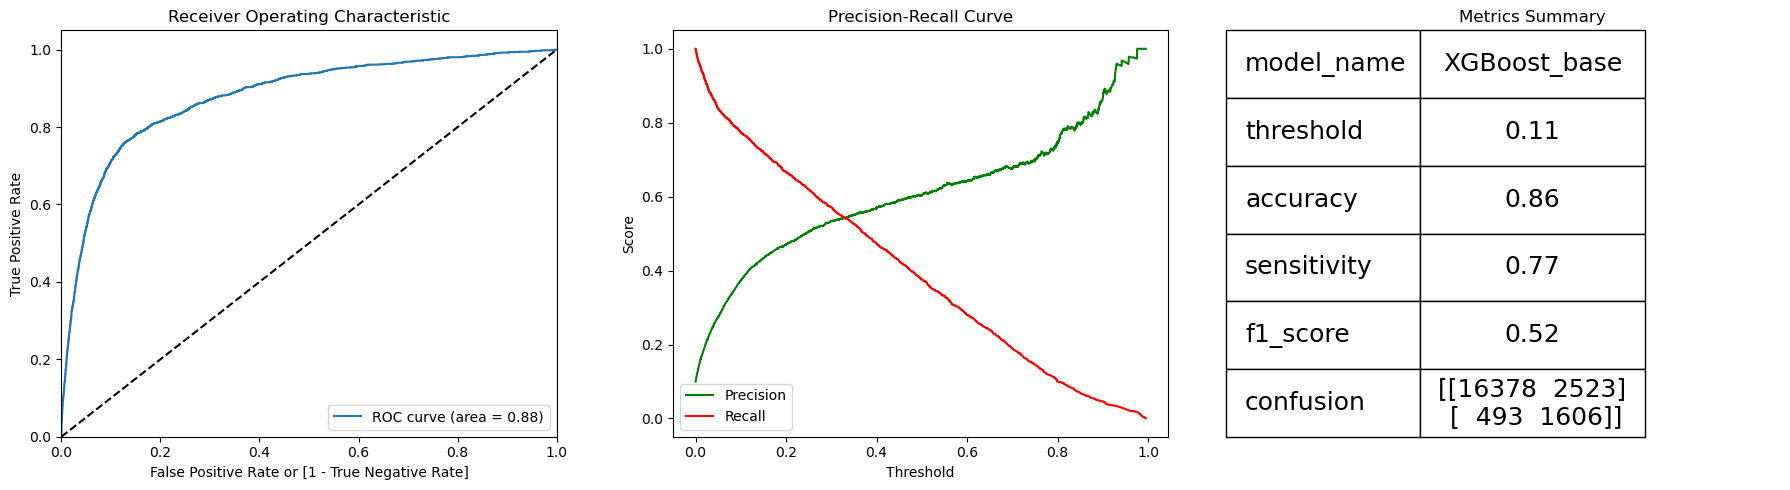

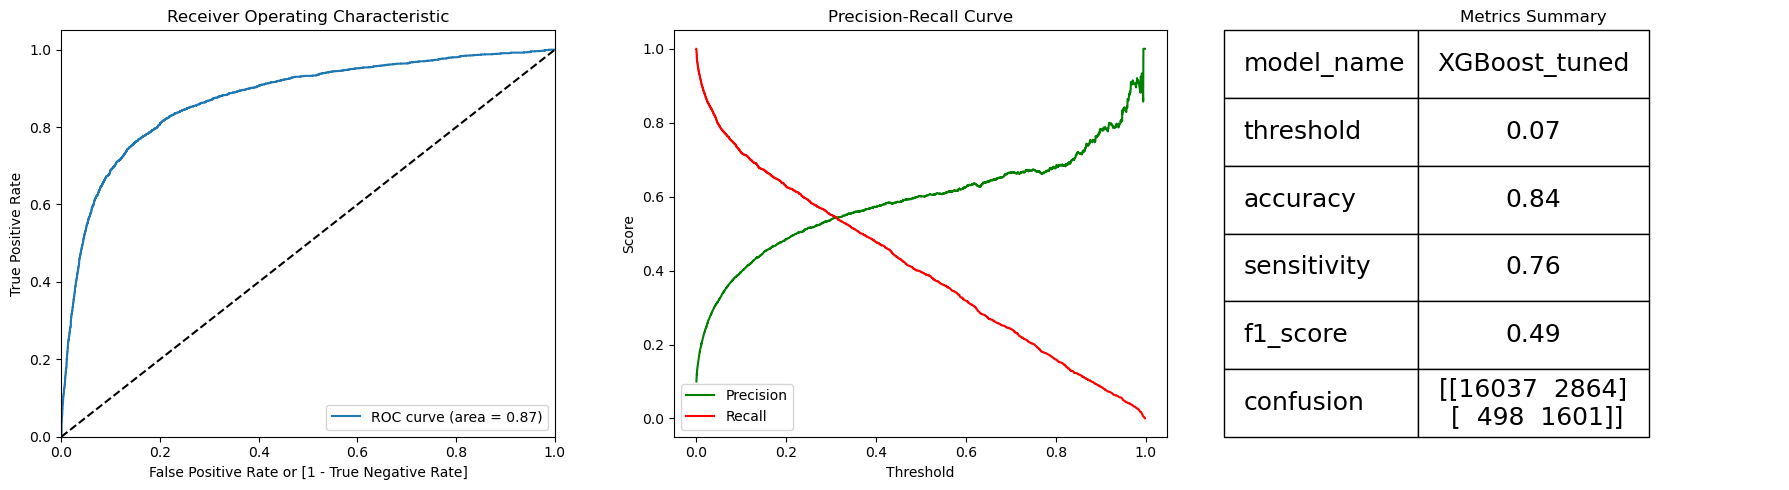

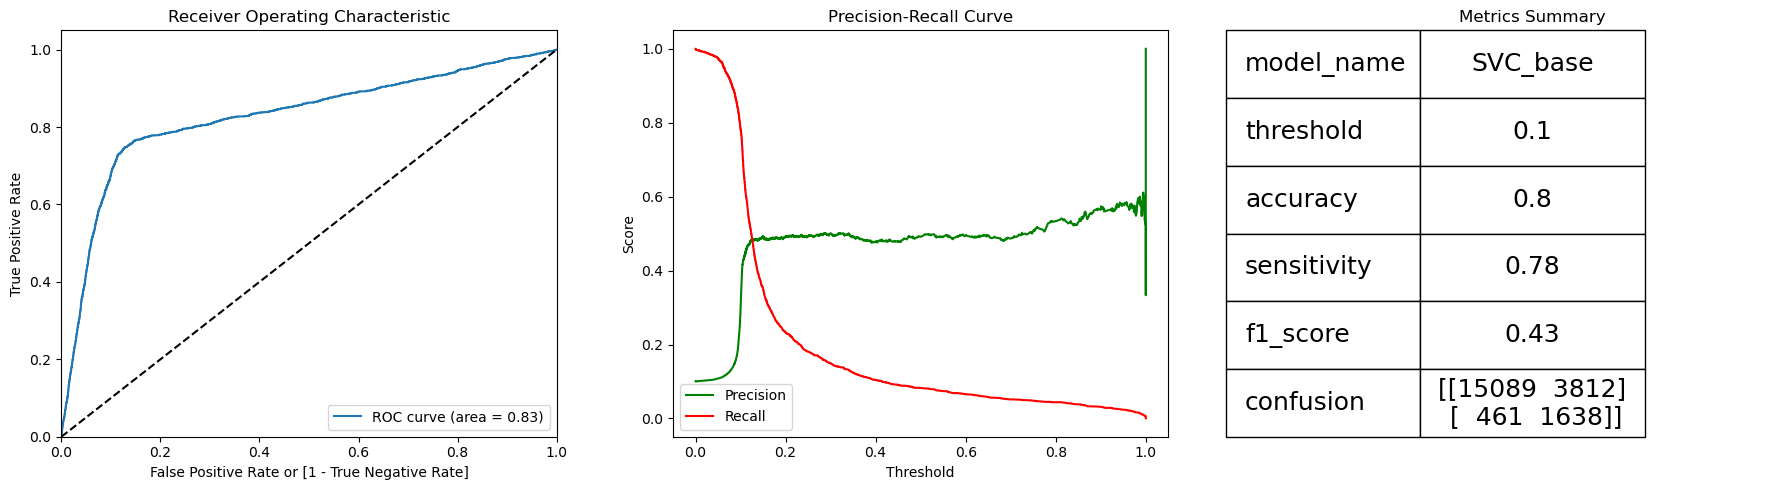

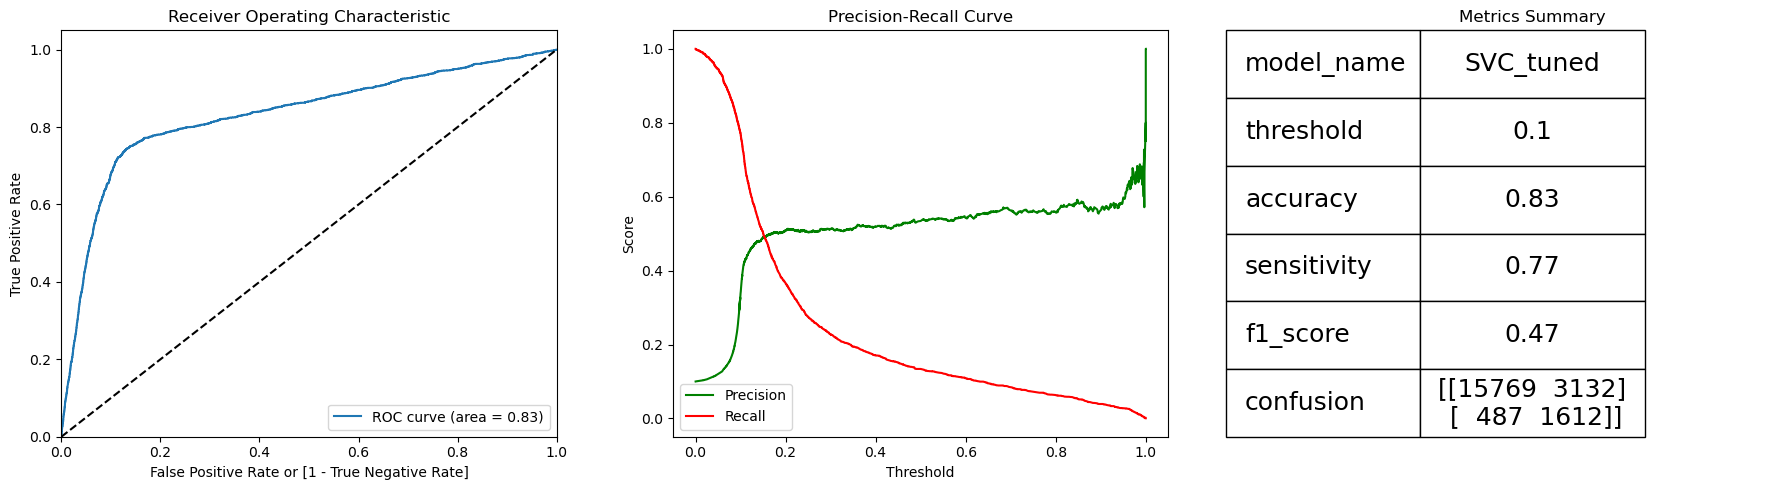

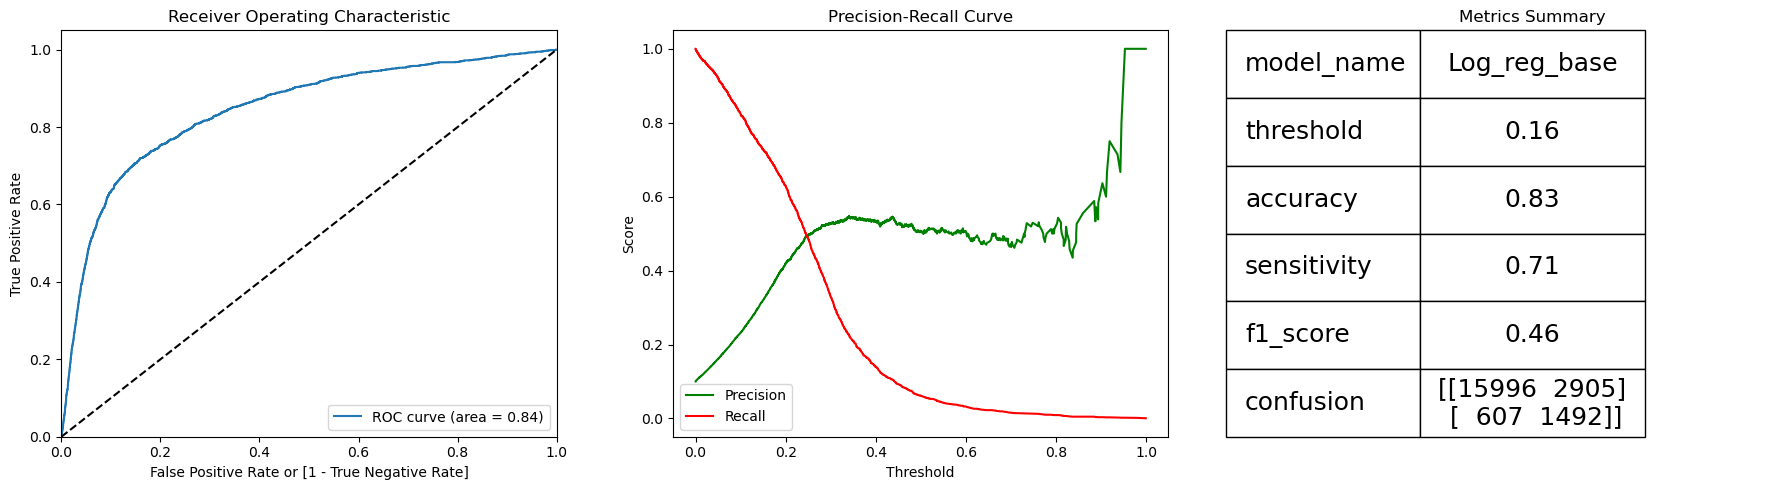

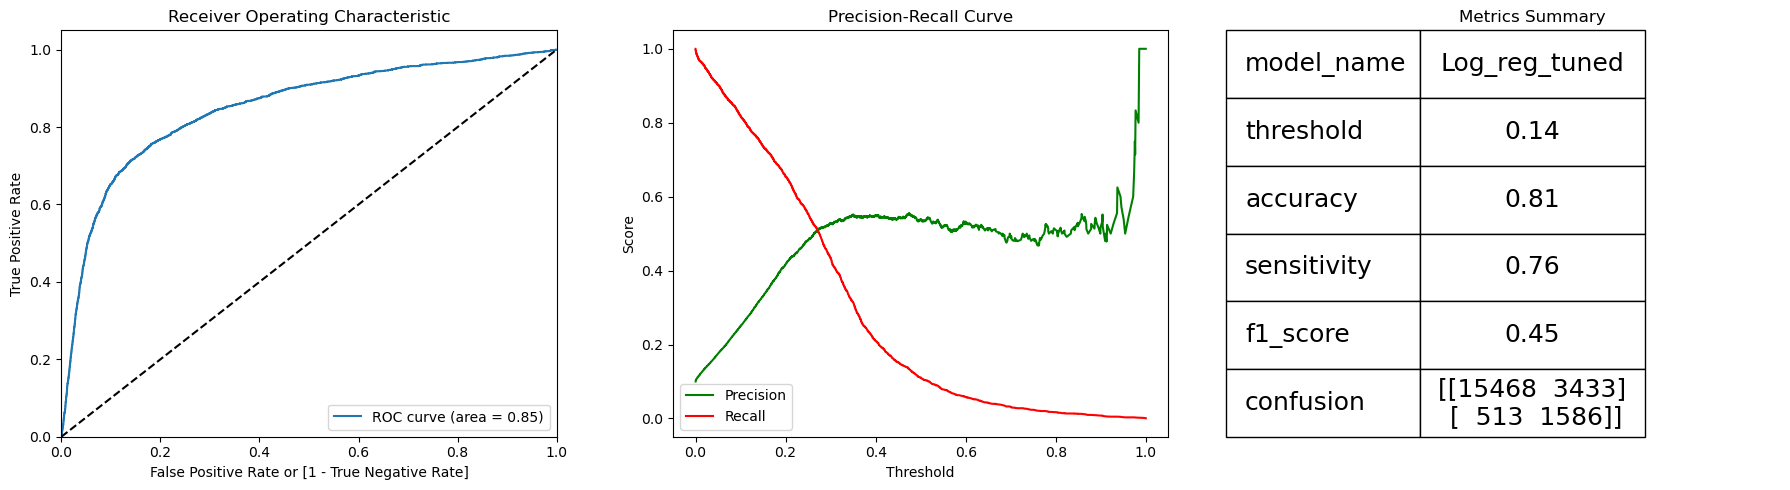

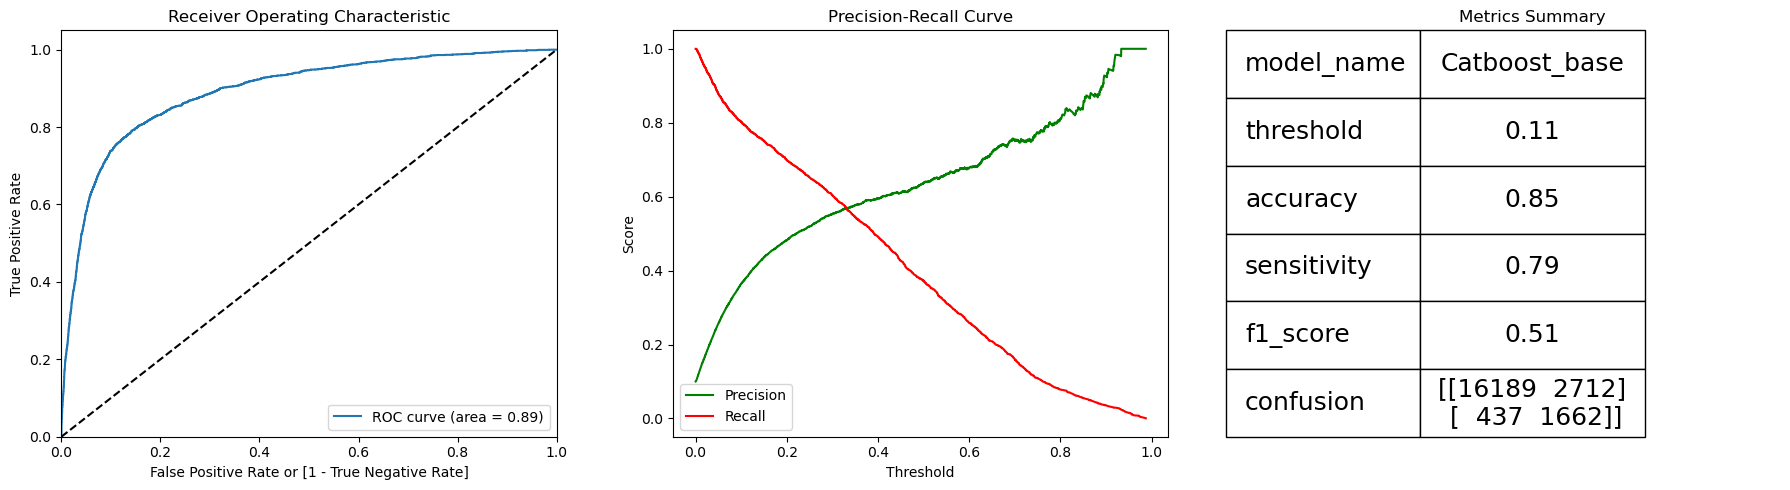

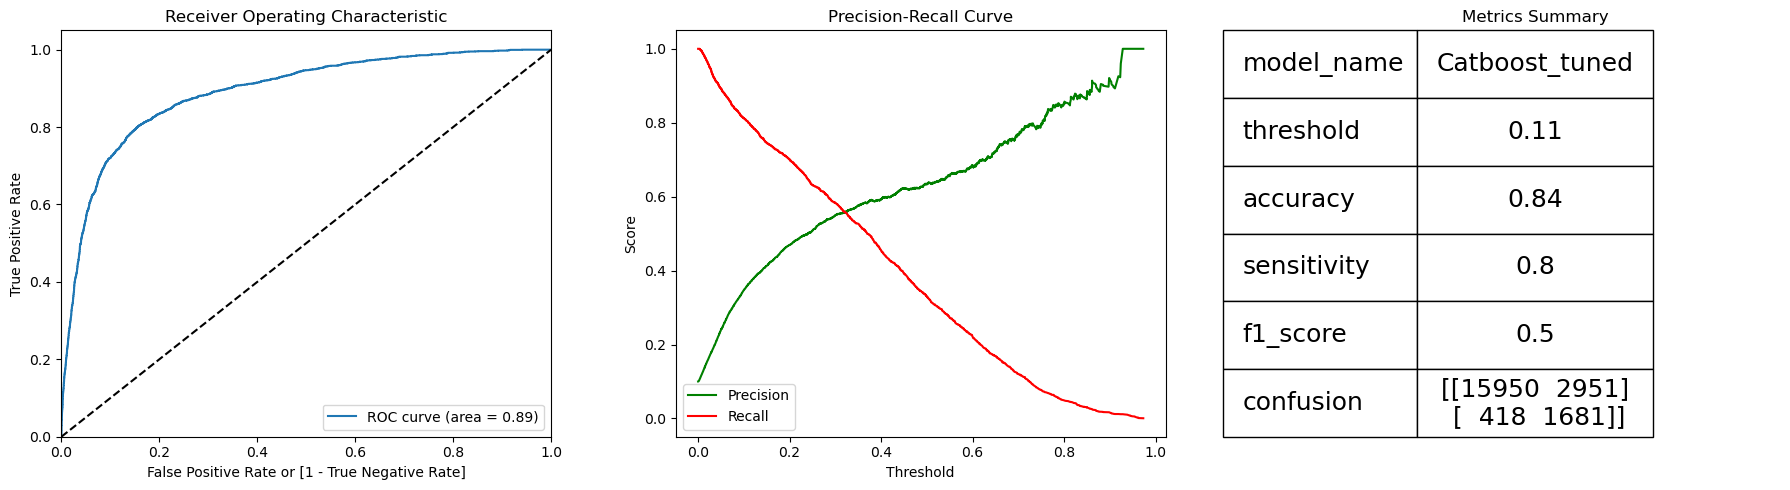

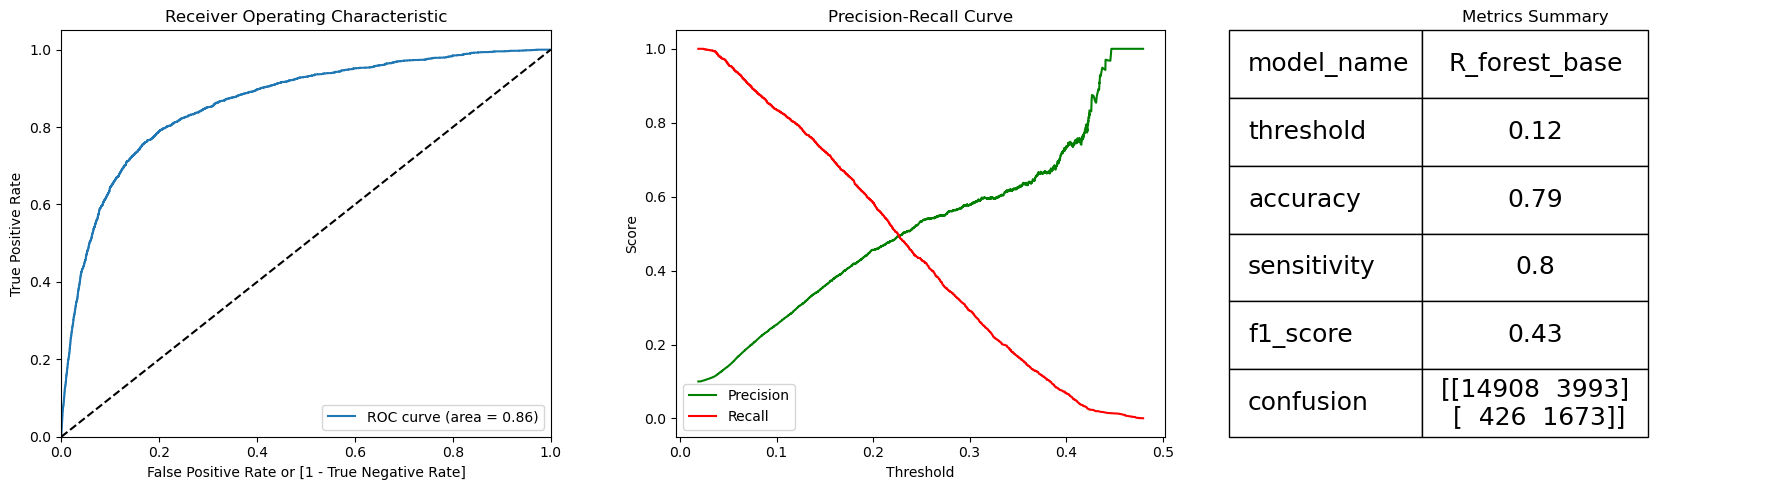

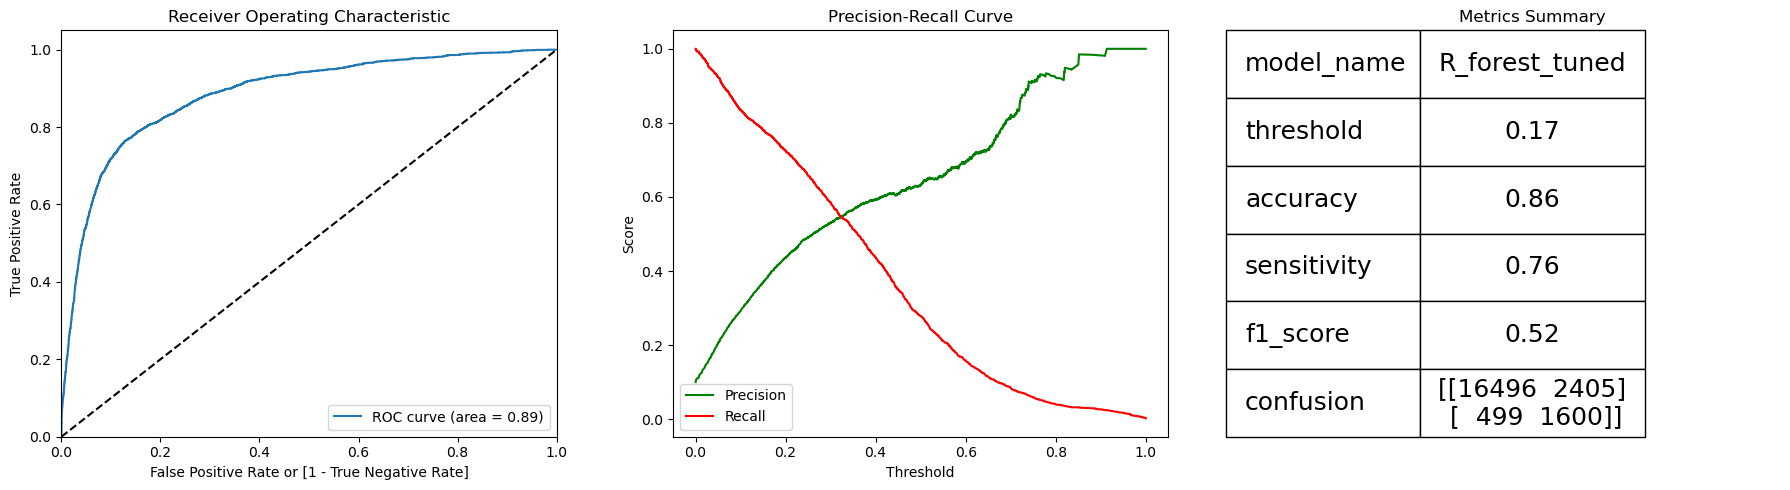

In [11]:
models.predict(test.data.X,test.data.y)

# Report

In [13]:
report.generate_report()

model_name,threshold,accuracy,sensitivity,f1_score,confusion
Catboost_tuned,0.110000,0.840000,0.800000,0.500000,[[15950 2951] [ 418 1681]]
R_forest_base,0.120000,0.790000,0.800000,0.430000,[[14908 3993] [ 426 1673]]
Catboost_base,0.110000,0.850000,0.790000,0.510000,[[16189 2712] [ 437 1662]]
SVC_base,0.100000,0.800000,0.780000,0.430000,[[15089 3812] [ 461 1638]]
XGBoost_base,0.110000,0.860000,0.770000,0.520000,[[16378 2523] [ 493 1606]]
SVC_tuned,0.100000,0.830000,0.770000,0.470000,[[15769 3132] [ 487 1612]]
XGBoost_tuned,0.070000,0.840000,0.760000,0.490000,[[16037 2864] [ 498 1601]]
Log_reg_tuned,0.140000,0.810000,0.760000,0.450000,[[15468 3433] [ 513 1586]]
R_forest_tuned,0.170000,0.860000,0.760000,0.520000,[[16496 2405] [ 499 1600]]
Log_reg_base,0.160000,0.830000,0.710000,0.460000,[[15996 2905] [ 607 1492]]


None


# Predict Unseen Data

In [15]:
final=pd.DataFrame()
final['id']=unseen_df['id']
final=final.set_index('id')
y_pred_proba=models.Catboost_tuned.model.predict_proba(unseen.data.X)
final['churn_probability']=models.Catboost_tuned.clmetrics.predict_unseen_data(y_pred_proba=y_pred_proba,is_prob=True)

In [16]:
final.head()

,churn_probability
id,
69999,0
70000,0
70001,0
70002,0
70003,0


In [17]:
filename='submission.csv'
if os.path.exists(filename):
        os.remove(filename)
final.to_csv(filename)